# Project: Traffic Sign Recognition

---
## Overview

---
## Introduction

---
## Dataset Exploration

In [2]:
#### enable plot visualization
%matplotlib inline
from importlib import reload
import utils; reload(utils)
from utils import *

### 1 Load the dataset

In [3]:
#### import and read data
import pickle

datasets_path = "datasets/"
# models_path = "models/"

training_data = datasets_path + "train.p"
validation_data = datasets_path + "valid.p"
testing_data = datasets_path + "test.p"

with open(training_data, mode = 'rb') as file:
    train = pickle.load(file)
with open(validation_data, mode = 'rb') as file:
    valid = pickle.load(file)
with open(testing_data, mode = 'rb') as file:
    test = pickle.load(file)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

### 2 Summary of the dataset

In [4]:
#### dimensions of training, validation and testing data
number_train = x_train.shape[0]
number_valid = x_valid.shape[0]
number_test = x_test.shape[0]
number_class = len(set(y_train))
image_shape = x_train.shape[1:]

print("number of training images = ", number_train)
print("number of validation images = ", number_valid)
print("number of testing images = ", number_test)
print("number of classes = ", number_class)
print("shape of each image = ", image_shape)

number of training images =  34799
number of validation images =  4410
number of testing images =  12630
number of classes =  43
shape of each image =  (32, 32, 3)


### 3 Group images by class

In [5]:
#### load mapping file
import pandas as pd

sign_names = pd.read_csv("signnames.csv")
sign_names.set_index("ClassId")

sign_names.head(5)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [6]:
#### map training, validation and testing data from label to name
x_train_label_to_name = label_to_name(y_train, sign_names)
x_valid_label_to_name = label_to_name(y_valid, sign_names)
x_test_label_to_name = label_to_name(y_test, sign_names)

x_train_label_to_name.head(5)

,id,label,name
0,0,41,End of no passing
1,1,41,End of no passing
2,2,41,End of no passing
3,3,41,End of no passing
4,4,41,End of no passing


In [7]:
#### group training, validation and testing data into counts
x_train_label_count = label_count(x_train_label_to_name)
x_valid_label_count = label_count(x_valid_label_to_name)
x_test_label_count = label_count(x_test_label_to_name)

x_train_label_count.head(5)

,,id
label,name,
0,Speed limit (20km/h),180
1,Speed limit (30km/h),1980
2,Speed limit (50km/h),2010
3,Speed limit (60km/h),1260
4,Speed limit (70km/h),1770


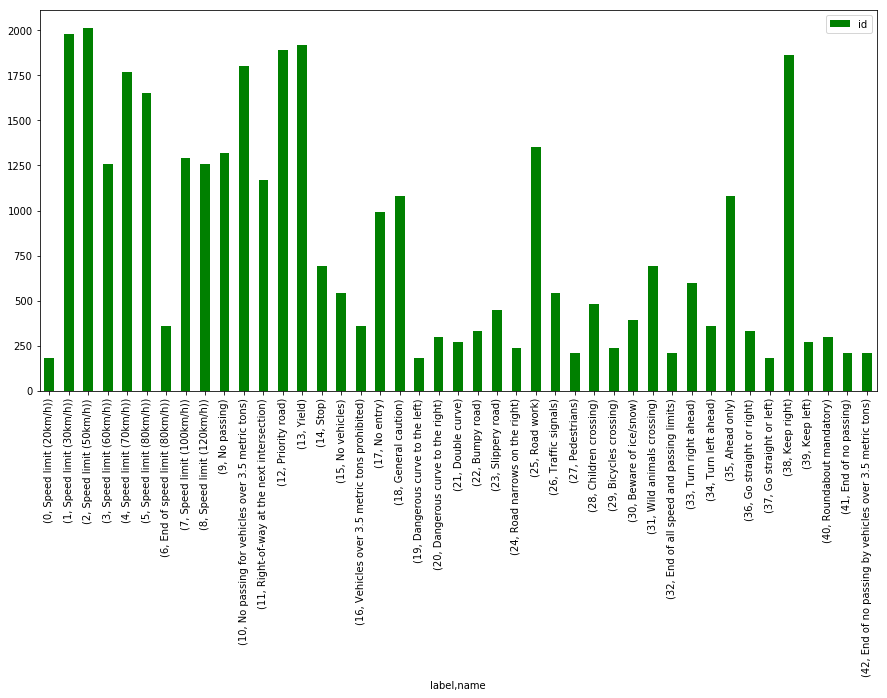

In [8]:
#### visualize the distribution of training data
x_train_label_count.plot(kind = 'bar', color = 'green', figsize = (15, 7))

### 4 Visualize the Dataset

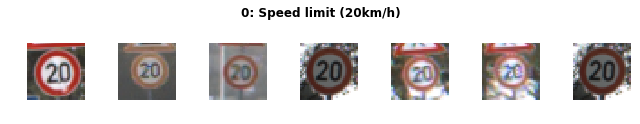

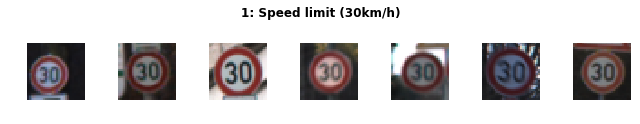

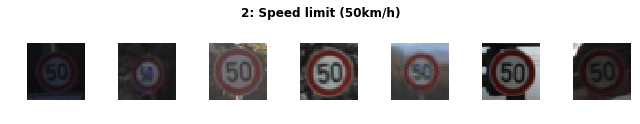

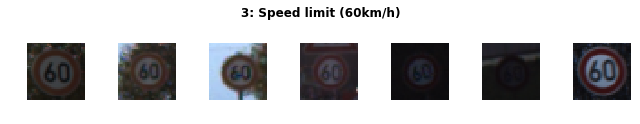

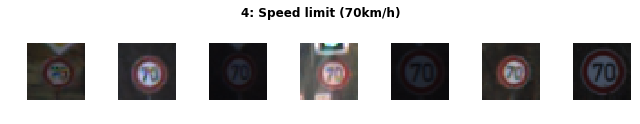

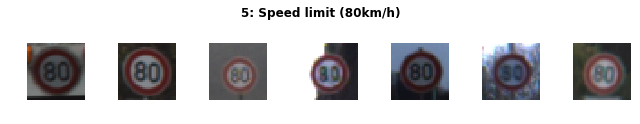

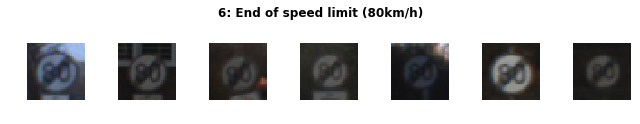

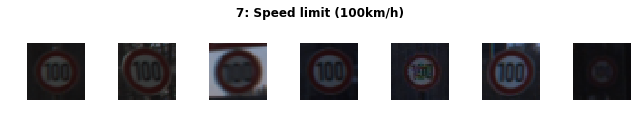

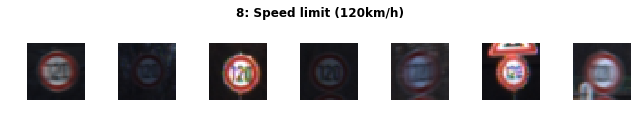

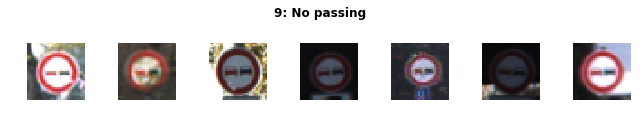

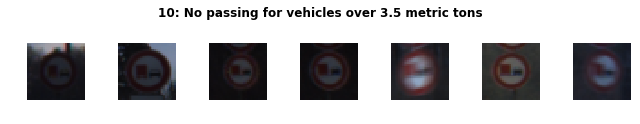

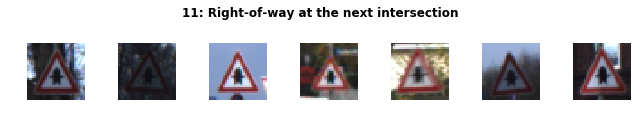

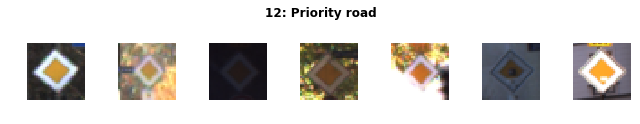

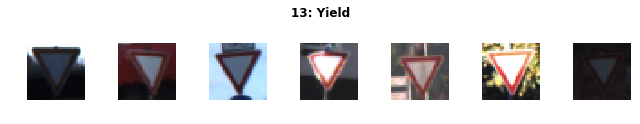

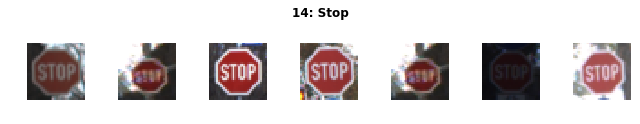

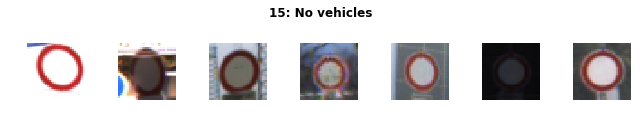

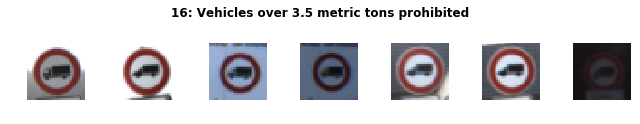

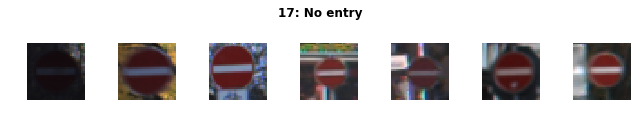

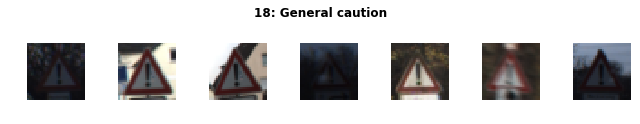

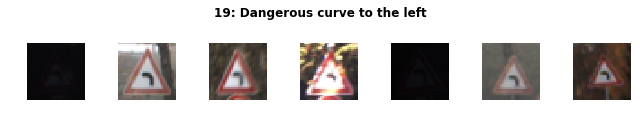

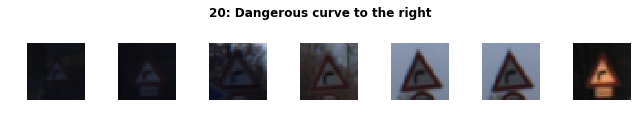

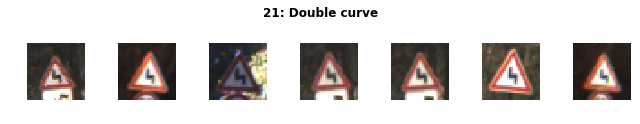

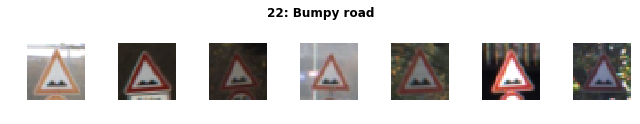

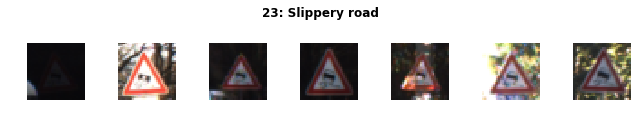

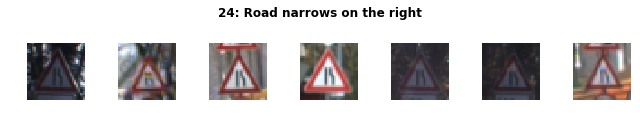

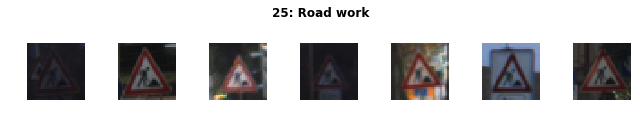

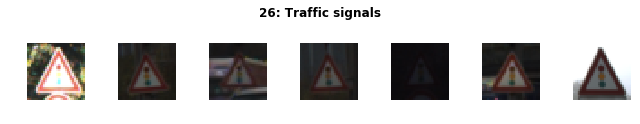

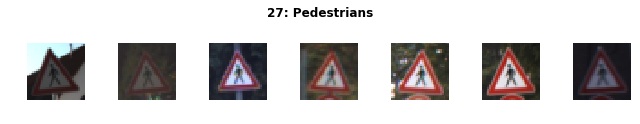

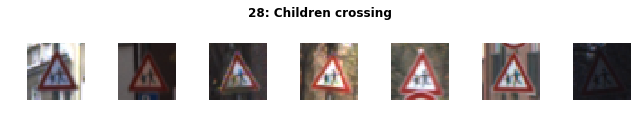

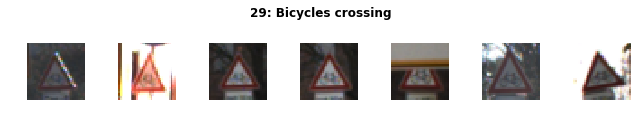

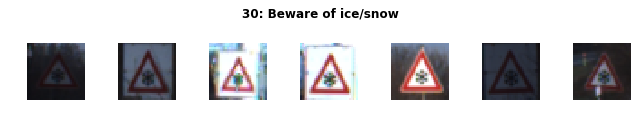

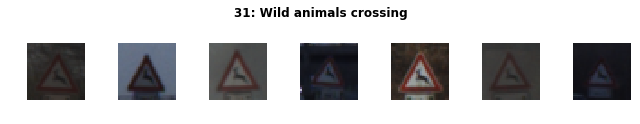

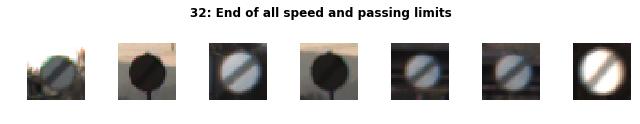

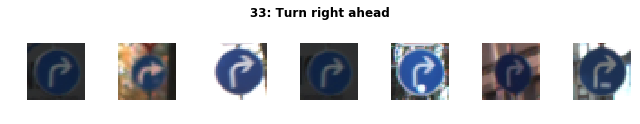

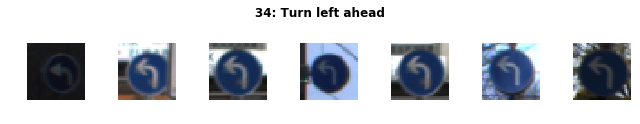

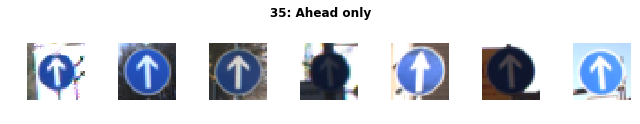

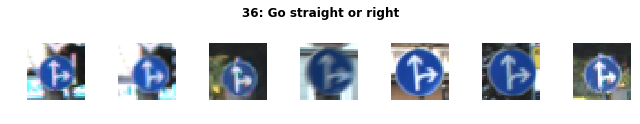

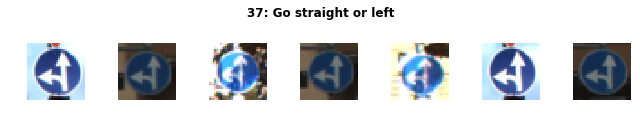

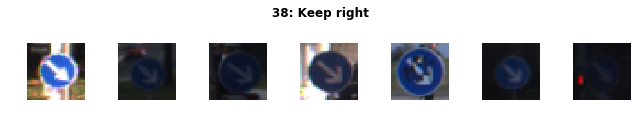

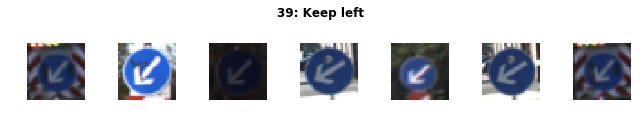

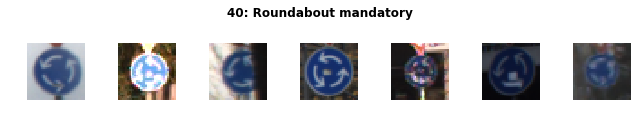

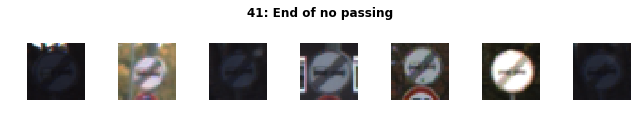

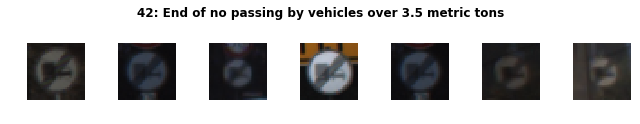

In [9]:
#### random show 10 images for each class
x_train_group = x_train_label_to_name.groupby(["label", "name"])
show_random_dataset_images(x_train_group, x_train)

---
## Data Preprocessing

### 1 Grayscale Image

In [10]:
#### grayscale training, testing and testing images
x_train_grayscale = np.asarray(list(map(lambda img: grayscale(img), x_train)))
x_valid_grayscale = np.asarray(list(map(lambda img: grayscale(img), x_valid)))
x_test_grayscale = np.asarray(list(map(lambda img: grayscale(img), x_test)))

x_train_grayscale = np.reshape(x_train_grayscale, (x_train_grayscale.shape[0], 32, 32, 1))
x_valid_grayscale = np.reshape(x_valid_grayscale, (x_valid_grayscale.shape[0], 32, 32, 1))
x_test_grayscale = np.reshape(x_test_grayscale, (x_test_grayscale.shape[0], 32, 32, 1))

### 2 Image Normalization

In [11]:
#### standard normalize training, validation and testing images
x_train_grayscale_normalized = standard_normalization(x_train_grayscale, x_train_grayscale)
x_valid_grayscale_normalized = standard_normalization(x_valid_grayscale, x_train_grayscale)
x_test_grayscale_normalized = standard_normalization(x_test_grayscale, x_train_grayscale)

### 3 Visualize the Dataset after processing

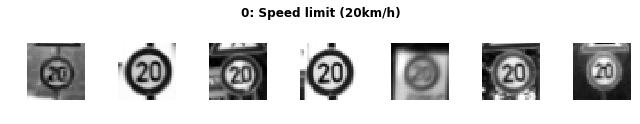

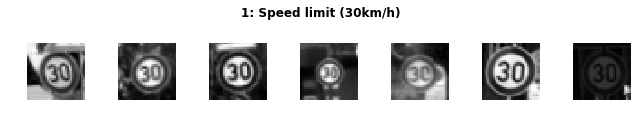

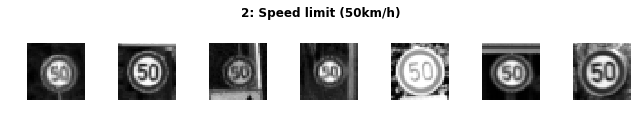

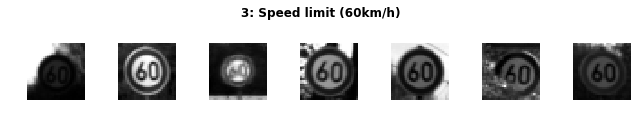

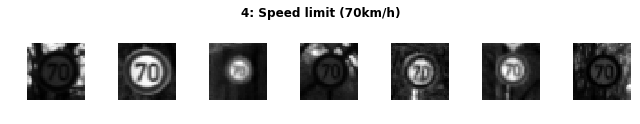

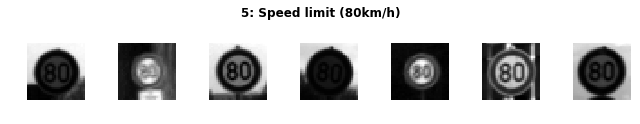

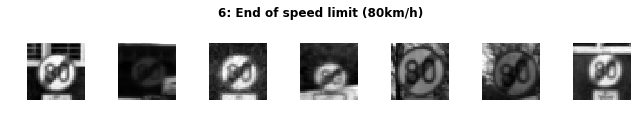

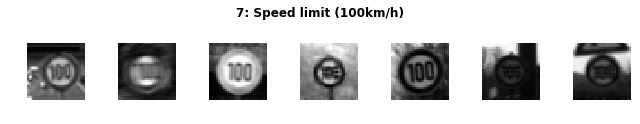

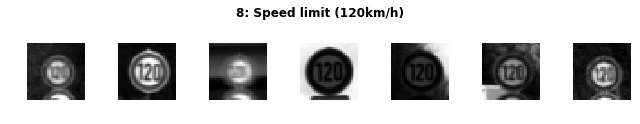

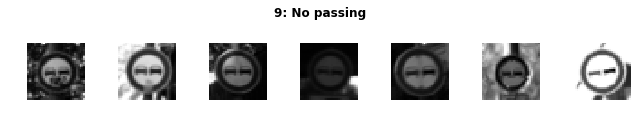

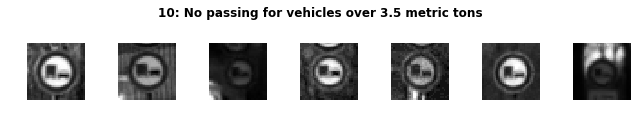

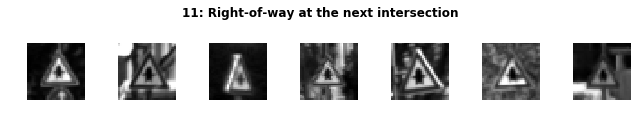

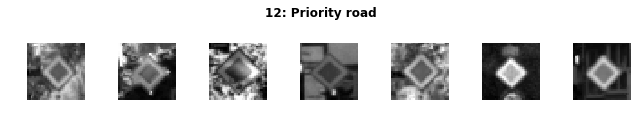

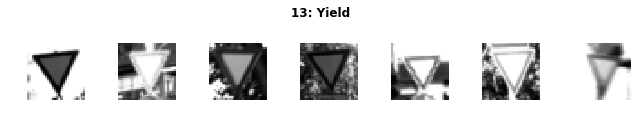

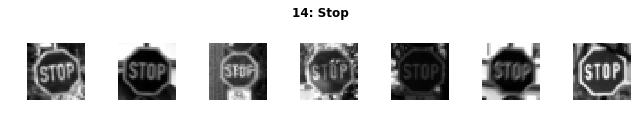

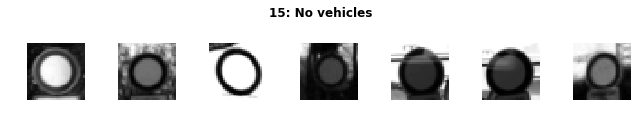

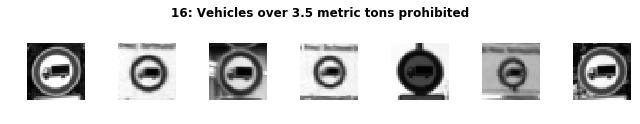

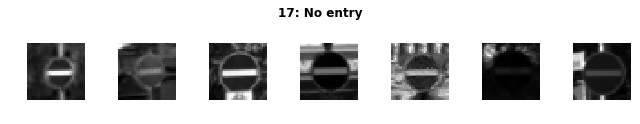

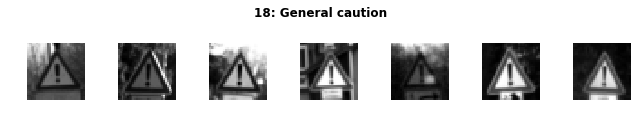

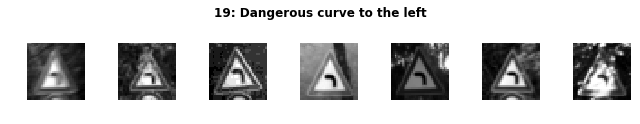

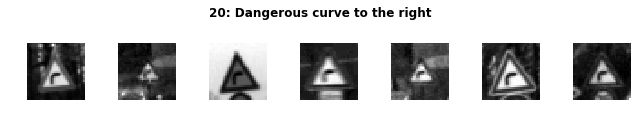

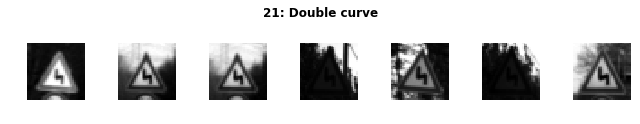

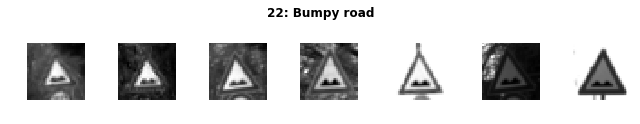

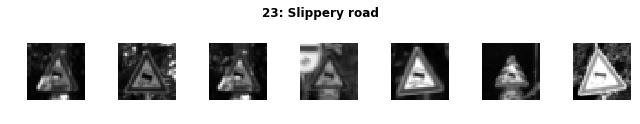

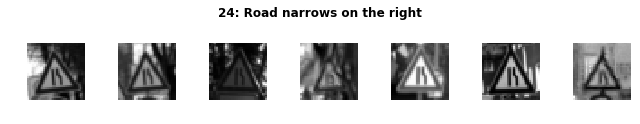

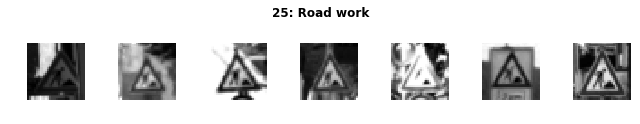

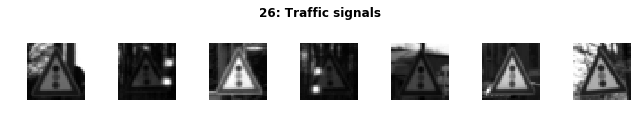

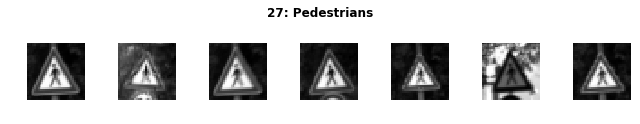

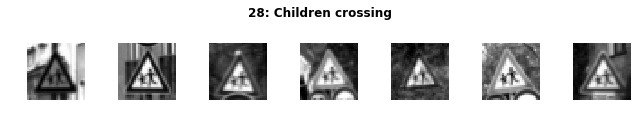

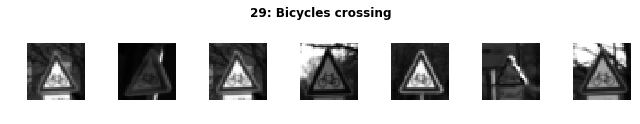

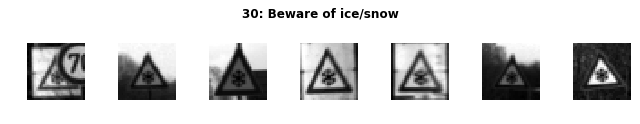

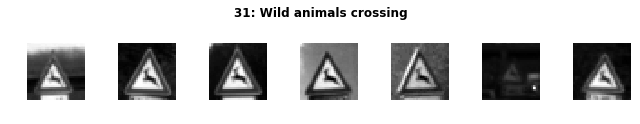

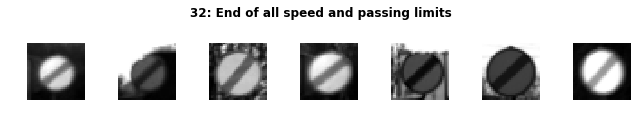

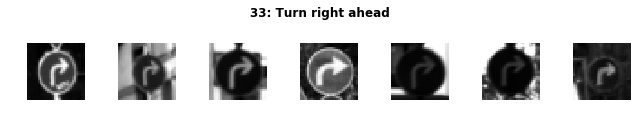

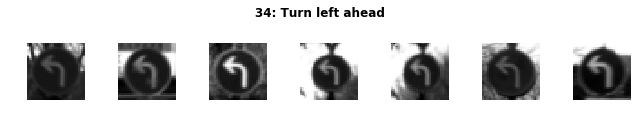

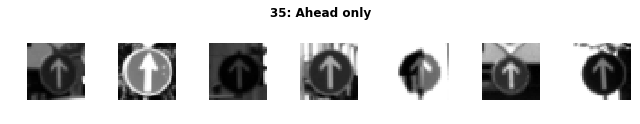

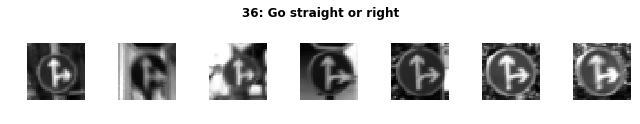

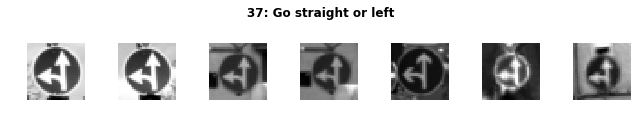

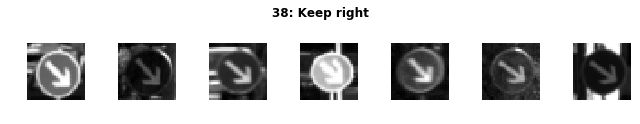

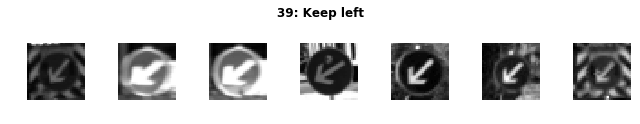

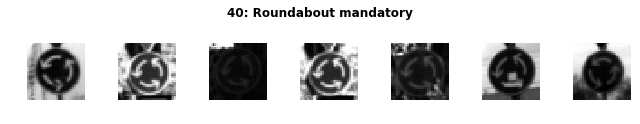

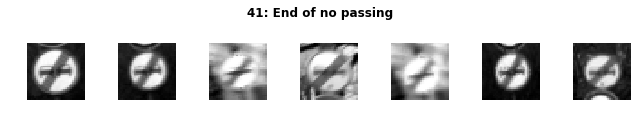

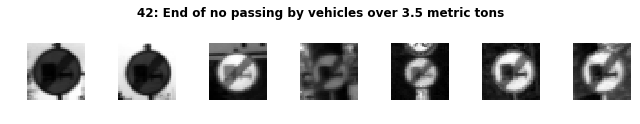

In [12]:
#### random show 10 grayscale and normalized images for each class
show_random_dataset_images(x_train_group, x_train_grayscale_normalized)

---
## Model Construction

In [25]:
#### import predefined ModelConfig and ModelExecutor and SOLeNet
import modelconfig; reload(modelconfig)
import modelexecutor; reload(modelexecutor)
import solenet; reload(solenet)
from modelconfig import ModelConfig
from modelexecutor import ModelExecutor
from solenet import *

---
## Training

### 1 Grayscale, Normalized Dataset without Dropout

In [26]:
MC_3x3 = ModelConfig(SOLeNet, "SOLeNet_Grayscale_Normalized_3x3", [32, 32, 1], [3, 32, 3], [120, 84], number_class, [1.0, 1.0])

In [27]:
ME_Grayscale_Normalized_3x3 = ModelExecutor(MC_3x3)

[SOLeNet] Building neural network [conv layers=3, conv filter size=3, conv start depth=32, fc layers=2]


In [24]:
(MC_3x3_Training_Metrics, MC_3x3_Validation_Metrics, MC_3x3_Duration) = ME_Grayscale_Normalized_3x3.train_model(x_train_grayscale_normalized, y_train, x_valid_grayscale_normalized, y_valid, epochs=100)
(MC_3x3_Testing_Accuracy, MC_3x3_Testing_Loss, MC_3x3_Testing_Duration) =  ME_Grayscale_Normalized_3x3.test_model(x_test_grayscale_normalized, y_test)

Training SOLeNet_Grayscale_Normalized_3x3 [epochs=1, batch_size=512]...



KeyboardInterrupt: 

### 2 Grayscale, Normalized Dataset with 25% Dropout

In [28]:
MC_3x3_25 = ModelConfig(SOLeNet, "SOLeNet_Grayscale_Normalized_3x3_Dropout_0.25", [32, 32, 1], [3, 32, 3], [120, 84], number_class, [0.75, 0.75])

In [29]:
ME_Grayscale_Normalized_3x3_25 = ModelExecutor(MC_3x3_25)

[SOLeNet] Building neural network [conv layers=3, conv filter size=3, conv start depth=32, fc layers=2]


In [ ]:
(MC_3x3_25_Training_Metrics, MC_3x3_25_Validation_Metrics, MC_3x3_25_Duration) = ME_Grayscale_Normalized_3x3_25.train_model(x_train_grayscale_normalized, y_train, x_valid_grayscale_normalized, y_valid, epochs=100)
(MC_3x3_25_Testing_Accuracy, MC_3x3_25_Testing_Loss, MC_3x3_25_Testing_Duration) =  ME_Grayscale_Normalized_3x3_25.test_model(x_test_grayscale_normalized, y_test)

### 3 Grayscale, Normalized Dataset with 50% Dropout

In [30]:
MC_3x3_50 = ModelConfig(SOLeNet, "SOLeNet_Grayscale_Normalized_3x3_Dropout_0.50", [32, 32, 1], [3, 32, 3], [120, 84], number_class, [0.50, 0.50])

In [31]:
ME_Grayscale_Normalized_3x3_50 = ModelExecutor(MC_3x3_50)

[SOLeNet] Building neural network [conv layers=3, conv filter size=3, conv start depth=32, fc layers=2]


In [ ]:
(MC_3x3_50_Training_Metrics, MC_3x3_50_Validation_Metrics, MC_3x3_50_Duration) = ME_Grayscale_Normalized_3x3_50.train_model(x_train_grayscale_normalized, y_train, x_valid_grayscale_normalized, y_valid, epochs=100)
(MC_3x3_50_Testing_Accuracy, MC_3x3_50_Testing_Loss, MC_3x3_50_Testing_Duration) =  ME_Grayscale_Normalized_3x3_50.test_model(x_test_grayscale_normalized, y_test)

---
## Model Analysis

### Reference